# MODEL EVALUATION

In [7]:
# TRAIN-TEST SPLIT
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cross_validation import train_test_split
import numpy as np
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"
seed = 7
np.random.seed(7)
dataset = np.loadtxt(path, delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.33, random_state=seed)
    # train-test split.
model = Sequential()
model.add(Dense(12, input_dim=8, init='uniform', activation='relu')) 
model.add(Dense(8, init='uniform', activation='relu')) 
model.add(Dense(1, init='uniform', activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=50, batch_size=10)

Train on 514 samples, validate on 254 samples
Epoch 1/50
514/514 [==============================] - 0s - loss: 0.6888 - acc: 0.6226 - val_loss: 0.6822 - val_acc: 0.6378
Epoch 2/50
514/514 [==============================] - 0s - loss: 0.6733 - acc: 0.6576 - val_loss: 0.6678 - val_acc: 0.6378
Epoch 3/50
514/514 [==============================] - 0s - loss: 0.6595 - acc: 0.6576 - val_loss: 0.6635 - val_acc: 0.6378
Epoch 4/50
514/514 [==============================] - 0s - loss: 0.6539 - acc: 0.6576 - val_loss: 0.6592 - val_acc: 0.6378
Epoch 5/50
514/514 [==============================] - 0s - loss: 0.6485 - acc: 0.6576 - val_loss: 0.6497 - val_acc: 0.6378
Epoch 6/50
514/514 [==============================] - 0s - loss: 0.6414 - acc: 0.6576 - val_loss: 0.6466 - val_acc: 0.6378
Epoch 7/50
514/514 [==============================] - 0s - loss: 0.6360 - acc: 0.6576 - val_loss: 0.6388 - val_acc: 0.6378
Epoch 8/50
514/514 [==============================] - 0s - loss: 0.6414 - acc: 0.6576 - val_l

In [9]:
# CROSS-VALIDATION
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cross_validation import StratifiedKFold
import numpy as np
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"
seed = 7
np.random.seed(7)
dataset = np.loadtxt(path, delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
kfold = StratifiedKFold(y=Y, n_folds=10, shuffle=True, random_state=seed)
    # kfold is an object which has a .test_folds array where
    #  each data point is labeled with a number 0-9 to indicate
    #  their cv fold index (cv=10).
cvscores = []
for i, (train, test) in enumerate(kfold):
    model = Sequential()
    model.add(Dense(12, input_dim=8, init='uniform', activation='relu')) 
    model.add(Dense(8, init='uniform', activation='relu')) 
    model.add(Dense(1, init='uniform', activation='sigmoid')) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(X[train], Y[train], nb_epoch=10, batch_size=10, verbose=0)
    scores = model.evaluate(X[test], Y[test], verbose=0)
    print "%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)
    cvscores.append(scores[1]*100)
print "%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores))

acc: 70.13%
acc: 66.23%
acc: 64.94%
acc: 70.13%
acc: 71.43%
acc: 66.23%
acc: 67.53%
acc: 61.04%
acc: 71.05%
acc: 64.47%
67.32% (+/- 3.20%)


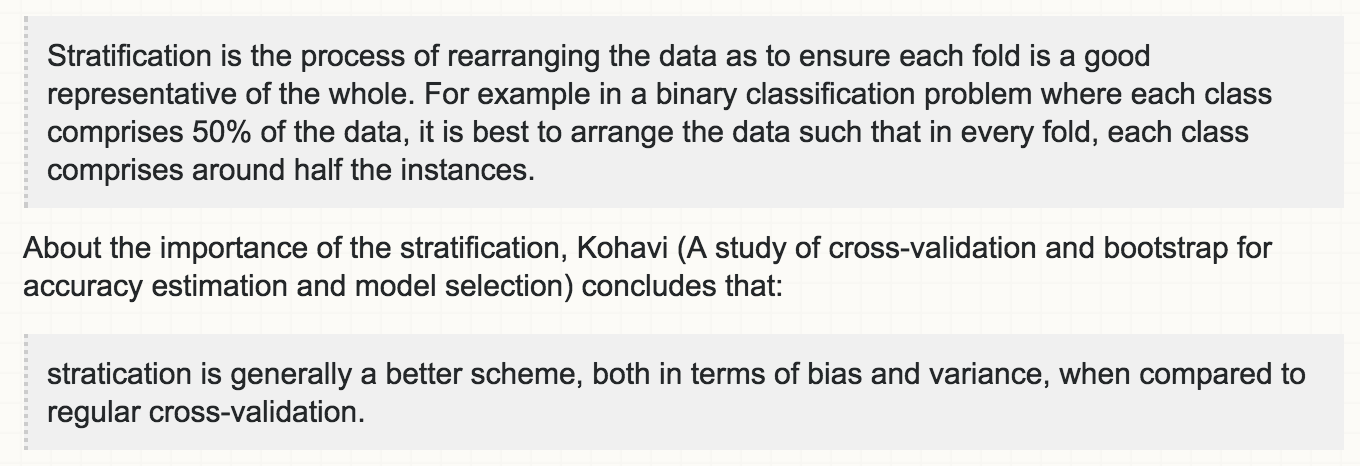

In [32]:
# StratifiedKFold vs. KFold
from IPython.display import Image
Image(filename='/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/stratified_kfold.png', 
      width="50%")

In [17]:
kfold.test_folds

array([9, 9, 9, 6, 5, 1, 7, 2, 7, 3, 8, 0, 6, 4, 2, 1, 4, 2, 9, 0, 5, 5, 2,
       9, 0, 4, 7, 5, 8, 5, 8, 0, 0, 2, 3, 3, 7, 0, 2, 3, 4, 8, 4, 5, 8, 9,
       1, 9, 9, 5, 9, 1, 5, 8, 2, 7, 6, 1, 1, 0, 8, 8, 4, 7, 0, 5, 5, 3, 9,
       7, 8, 2, 1, 2, 9, 7, 9, 6, 5, 3, 8, 5, 6, 2, 1, 0, 1, 3, 1, 7, 4, 1,
       2, 8, 1, 2, 0, 4, 2, 9, 6, 6, 5, 1, 3, 9, 9, 5, 4, 0, 4, 5, 8, 9, 6,
       9, 2, 3, 1, 9, 7, 6, 6, 4, 9, 6, 2, 1, 8, 6, 1, 7, 8, 3, 0, 8, 2, 6,
       3, 6, 3, 1, 0, 7, 5, 8, 5, 4, 6, 2, 4, 2, 1, 3, 6, 6, 7, 0, 3, 4, 9,
       3, 6, 7, 1, 9, 7, 4, 2, 7, 0, 2, 2, 9, 4, 1, 2, 7, 0, 4, 6, 6, 0, 8,
       1, 4, 5, 4, 4, 0, 6, 4, 5, 4, 8, 4, 7, 0, 5, 3, 4, 5, 5, 5, 2, 8, 7,
       8, 7, 9, 0, 4, 7, 1, 7, 2, 5, 7, 9, 3, 8, 5, 7, 9, 0, 3, 3, 8, 2, 7,
       8, 7, 5, 5, 2, 8, 3, 6, 9, 2, 2, 3, 3, 0, 8, 2, 4, 8, 9, 5, 4, 0, 5,
       4, 6, 9, 6, 2, 5, 2, 6, 3, 1, 3, 7, 2, 7, 2, 7, 7, 9, 9, 1, 7, 4, 4,
       6, 3, 3, 4, 2, 9, 5, 8, 7, 4, 5, 7, 0, 7, 4, 3, 3, 4, 6, 9, 4, 4, 3,
       9, 1,

# ML TASKS

### A. CLASSIFIER WRAPPING

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.cross_validation import StratifiedKFold, cross_val_score
import numpy as np
import pandas as pd
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"

In [11]:
# MODEL GENERATING FUNCTION
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, init='uniform', activation='relu')) 
    model.add(Dense(8, init='uniform', activation='relu')) 
    model.add(Dense(1, init='uniform', activation='sigmoid')) 
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
%%time
# MODEL FIT + AUTOMATIC CV
seed = 7
np.random.seed(seed)
dataset = np.loadtxt(path, delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn=create_model, nb_epoch=10, batch_size=10, verbose=0)
kfold = StratifiedKFold(y=Y, n_folds=10, shuffle=True, random_state=seed)
results = cross_val_score(model, X, Y, cv=kfold)
print results.mean()

0.673188658136
CPU times: user 15.9 s, sys: 68.4 ms, total: 16 s
Wall time: 16 s


### B. GRID SEARCH (PARAMETER TUNING)

In [21]:
# PARAMETERS CONSIDERED 
#  - optimizers.
#  - initializers.
#  - epoch sizes.
#  - batch sizes.
#  SCHEME TESTED: 2 * 3 * 3 * 3.

In [24]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.grid_search import GridSearchCV
import numpy as np
import pandas as pd
path = "/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/OJO/DEEP_LEARNING/DATA/uci/pima-indians-diabetes/pima-indians-diabetes.csv"

In [26]:
# ENHANCED MODEL GENERATING FUNCTION
def create_model(optimizer='rmsprop', init='glorot_uniform'):
    model = Sequential()
    model.add(Dense(12, input_dim=8, init=init, activation='relu'))
    model.add(Dense(8, init=init, activation='relu'))
    model.add(Dense(1, init=init, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [30]:
%%time 
# MODEL FIT + GRID SEARCH
#  WARNING: TAKES A 1,000,000,000,000 YRS TO RUN.
seed = 7
np.random.seed(seed)
dataset = np.loadtxt(path, delimiter=",")
X = dataset[:,0:8]
Y = dataset[:,8]
model = KerasClassifier(build_fn=create_model, verbose=0)
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = np.array([5, 10, 15])
batches = np.array([2, 5, 10])
    # 2*3*3*3 grid search scheme specified.
param_grid = dict(optimizer=optimizers, nb_epoch=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X, Y)
print "Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)
for params, mean_score, scores in grid_result.grid_scores_:
    print "%f (%f) with: %r" % (scores.mean(), scores.std(), params)

Best: 0.691406 using {'init': 'uniform', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 5}
0.634115 (0.016053) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 5, 'batch_size': 2}
0.571615 (0.134651) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 5, 'batch_size': 2}
0.656250 (0.025315) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 10, 'batch_size': 2}
0.600260 (0.041626) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 10, 'batch_size': 2}
0.630208 (0.023939) with: {'init': 'glorot_uniform', 'optimizer': 'rmsprop', 'nb_epoch': 15, 'batch_size': 2}
0.549479 (0.151300) with: {'init': 'glorot_uniform', 'optimizer': 'adam', 'nb_epoch': 15, 'batch_size': 2}
0.643229 (0.018688) with: {'init': 'normal', 'optimizer': 'rmsprop', 'nb_epoch': 5, 'batch_size': 2}
0.656250 (0.028348) with: {'init': 'normal', 'optimizer': 'adam', 'nb_epoch': 5, 'batch_size': 2}
0.684896 (0.001841) with: {'init': 'normal', 'optimizer':